In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.neural_network import MLPClassifier

In [2]:
train_x = pd.read_csv("D:\DataScience_2019501124\Code Camps\Logistic Regression\\marketing_training.csv",index_col=0)
train_x

,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
custAge,,,,,,,,,,,,,,,,,,,,,
55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,1,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0,no
NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,1,...,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0,no
42.0,technician,married,high.school,no,no,no,telephone,may,mon,1,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0,no
55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,2,...,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no
NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,5,...,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33.0,blue-collar,single,high.school,no,no,no,telephone,may,wed,3,...,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,999.0,0,no
45.0,blue-collar,married,basic.4y,unknown,no,no,telephone,jul,tue,3,...,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0,no
27.0,blue-collar,single,NaN,no,no,no,cellular,may,fri,2,...,1,failure,-1.8,92.893,-46.2,1.250,5099.1,999.0,3,no


,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
custAge,,,,,,,,,,,,,,,,,,,,
55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,999.0,0
NaN,blue-collar,married,NaN,no,no,no,cellular,jul,mon,1,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0
42.0,technician,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,999.0,0
55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999.0,0
NaN,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,5,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33.0,blue-collar,single,high.school,no,no,no,telephone,may,wed,3,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,999.0,0
45.0,blue-collar,married,basic.4y,unknown,no,no,telephone,jul,tue,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999.0,0
27.0,blue-collar,single,NaN,no,no,no,cellular,may,fri,2,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1,999.0,3


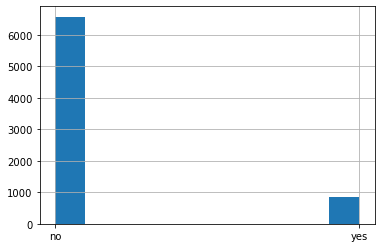

In [3]:
train_y = train_x['responded']
train_y.hist()
train_x.drop('responded',axis=1,inplace=True)
train_x

In [4]:
test_x = pd.read_csv("D:\DataScience_2019501124\Code Camps\Logistic Regression\\marketing_test.csv",index_col=0)
test_x

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
index,,,,,,,,,,,,,,,,,,,,,
0,NaN,entrepreneur,married,university.degree,no,yes,no,cellular,jul,wed,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,999.0,0
1,58.0,entrepreneur,married,university.degree,unknown,no,no,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,999.0,0
2,48.0,entrepreneur,married,NaN,no,no,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0
3,35.0,blue-collar,married,NaN,no,yes,no,telephone,jun,tue,...,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,999.0,0
4,39.0,blue-collar,married,basic.6y,no,no,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,999.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,33.0,blue-collar,divorced,NaN,no,yes,no,cellular,nov,thu,...,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,999.0,0
820,51.0,blue-collar,married,NaN,no,no,no,cellular,may,fri,...,999,2,failure,-1.8,92.893,-46.2,1.313,5099.1,999.0,6
821,57.0,blue-collar,divorced,professional.course,no,no,no,telephone,may,wed,...,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,999.0,0


In [5]:
sample_size = len(train_x)
sample_size

7414

In [6]:
sample_size = len(test_x)
sample_size

824

In [7]:
train_col_with_nullvalues=[[col,float(train_x[col].isnull().sum())/float(sample_size)] for col in train_x.columns if train_x[col].isnull().sum()]
train_col_with_nullvalues


[['schooling', 2.6152912621359223], ['day_of_week', 0.8628640776699029]]

In [8]:
test_col_with_nullvalues=[[col,float(test_x[col].isnull().sum())/float(sample_size)] for col in test_x.columns if test_x[col].isnull().sum()]
test_col_with_nullvalues

[['custAge', 0.25485436893203883],
 ['schooling', 0.30461165048543687],
 ['day_of_week', 0.09223300970873786]]

In [9]:
train_col_to_drop=[x for (x,y) in train_col_with_nullvalues if y>0.3]
train_col_to_drop


['schooling', 'day_of_week']

In [10]:
test_col_to_drop=[x for (x,y) in test_col_with_nullvalues if y>0.3]
test_col_to_drop

['schooling']

In [11]:
train_x.drop(train_col_to_drop,axis=1,inplace=True)
print(train_x)

          profession   marital  default housing loan    contact month  \
custAge                                                                 
55.0          admin.    single  unknown      no   no   cellular   nov   
NaN      blue-collar   married       no      no   no   cellular   jul   
42.0      technician   married       no      no   no  telephone   may   
55.0      management  divorced  unknown     yes  yes   cellular   jul   
NaN           admin.  divorced       no     yes   no   cellular   may   
...              ...       ...      ...     ...  ...        ...   ...   
33.0     blue-collar    single       no      no   no  telephone   may   
45.0     blue-collar   married  unknown      no   no  telephone   jul   
27.0     blue-collar    single       no      no   no   cellular   may   
51.0      unemployed  divorced  unknown     yes   no   cellular   nov   
38.0     blue-collar   married       no     yes   no  telephone   may   

         campaign  pdays  previous     poutcome  e

In [12]:
test_x.drop(test_col_to_drop,axis=1,inplace=True)
print(test_x)

       custAge    profession   marital  default housing loan    contact month  \
index                                                                           
0          NaN  entrepreneur   married       no     yes   no   cellular   jul   
1         58.0  entrepreneur   married  unknown      no   no  telephone   jun   
2         48.0  entrepreneur   married       no      no   no   cellular   jul   
3         35.0   blue-collar   married       no     yes   no  telephone   jun   
4         39.0   blue-collar   married       no      no   no   cellular   jul   
...        ...           ...       ...      ...     ...  ...        ...   ...   
819       33.0   blue-collar  divorced       no     yes   no   cellular   nov   
820       51.0   blue-collar   married       no      no   no   cellular   may   
821       57.0   blue-collar  divorced       no      no   no  telephone   may   
822       51.0   blue-collar   married       no     yes   no  telephone   may   
823       27.0   blue-collar

In [13]:
train_categorical_columns=[col for col in train_x.columns if train_x[col].dtype==object]
train_categorical_columns
print(len(train_categorical_columns))
train_ordinal_columns=[col for col in train_x.columns if col not in train_categorical_columns]
train_ordinal_columns
print((train_ordinal_columns))

8
['campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail']


In [14]:
test_categorical_columns=[col for col in test_x.columns if test_x[col].dtype==object]
test_categorical_columns
print(len(test_categorical_columns))
test_ordinal_columns=[col for col in test_x.columns if col not in test_categorical_columns]
test_ordinal_columns
print(len(test_ordinal_columns))

9
11


In [15]:
dummy_row=list()
for col in train_x.columns:
    if col in train_categorical_columns:
        dummy_row.append("dummy")
    else:
        dummy_row.append("")
new_row = pd.DataFrame([dummy_row],columns=train_x.columns)
train_x = pd.concat([train_x,new_row],axis=0, ignore_index=True)
train_x

,profession,marital,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,admin.,single,unknown,no,no,cellular,nov,1,999,0,nonexistent,-0.1,93.2,-42,4.191,5195.8,999,0
1,blue-collar,married,no,no,no,cellular,jul,1,999,0,nonexistent,1.4,93.918,-42.7,4.96,5228.1,999,0
2,technician,married,no,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,999,0
3,management,divorced,unknown,yes,yes,cellular,jul,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,999,0
4,admin.,divorced,no,yes,no,cellular,may,5,999,1,failure,-1.8,92.893,-46.2,1.291,5099.1,999,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7410,blue-collar,married,unknown,no,no,telephone,jul,3,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,999,0
7411,blue-collar,single,no,no,no,cellular,may,2,999,1,failure,-1.8,92.893,-46.2,1.25,5099.1,999,3
7412,unemployed,divorced,unknown,yes,no,cellular,nov,2,999,0,nonexistent,-0.1,93.2,-42,4.076,5195.8,999,0
7413,blue-collar,married,no,yes,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191,999,0


In [16]:
for col in train_categorical_columns:
    train_x[col].fillna(value="dummy",inplace=True)
    test_x[col].fillna(value="dummy",inplace=True)
    
enc = OneHotEncoder(drop='first',sparse=False)
enc.fit(train_x[train_categorical_columns])
trainx_enc=pd.DataFrame(enc.transform(train_x[train_categorical_columns]))
trainx_enc.columns=enc.get_feature_names(train_categorical_columns)

testx_enc=pd.DataFrame(enc.transform(test_x[train_categorical_columns]))
testx_enc.columns=enc.get_feature_names(train_categorical_columns)

train_x = pd.concat([train_x[train_ordinal_columns],trainx_enc],axis=1,ignore_index=True)
test_x = pd.concat([test_x[train_ordinal_columns],testx_enc],axis=1,ignore_index=True)

train_x.drop(train_x.tail(1).index,inplace=True)
train_x

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,999,0,-0.1,93.2,-42,4.191,5195.8,999,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,999,0,1.4,93.918,-42.7,4.96,5228.1,999,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,999,0,1.1,93.994,-36.4,4.857,5191,999,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,999,0,1.4,93.918,-42.7,4.962,5228.1,999,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5,999,1,-1.8,92.893,-46.2,1.291,5099.1,999,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,3,999,0,1.1,93.994,-36.4,4.859,5191,999,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7410,3,999,0,1.4,93.918,-42.7,4.961,5228.1,999,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7411,2,999,1,-1.8,92.893,-46.2,1.25,5099.1,999,3,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7412,2,999,0,-0.1,93.2,-42,4.076,5195.8,999,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [17]:
imputer = KNNImputer(n_neighbors=2)
imputer.fit(train_x)
trainx_filled = imputer.transform(train_x)
trainx_filled=pd.DataFrame(trainx_filled,columns=train_x.columns)
trainx_filled

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.191,5195.8,999.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,999.0,0.0,1.4,93.918,-42.7,4.960,5228.1,999.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,999.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,999.0,0.0,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,999.0,1.0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,3.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0,999.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7410,3.0,999.0,0.0,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7411,2.0,999.0,1.0,-1.8,92.893,-46.2,1.250,5099.1,999.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7412,2.0,999.0,0.0,-0.1,93.200,-42.0,4.076,5195.8,999.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [18]:
testx_filled = imputer.transform(test_x)
testx_filled=pd.DataFrame(trainx_filled,columns=test_x.columns)
testx_filled.reset_index(drop=True,inplace=True)
testx_filled

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.0,999.0,0.0,-0.1,93.200,-42.0,4.191,5195.8,999.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,999.0,0.0,1.4,93.918,-42.7,4.960,5228.1,999.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,999.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,999.0,0.0,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,999.0,1.0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,3.0,999.0,0.0,1.1,93.994,-36.4,4.859,5191.0,999.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7410,3.0,999.0,0.0,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7411,2.0,999.0,1.0,-1.8,92.893,-46.2,1.250,5099.1,999.0,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7412,2.0,999.0,0.0,-0.1,93.200,-42.0,4.076,5195.8,999.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [19]:
scaler = preprocessing.StandardScaler().fit(trainx_filled)
train_x=scaler.transform(trainx_filled)
test_x=scaler.transform(testx_filled)
print(test_x)
print(train_x)

[[-0.56341931  0.20212126 -0.35629354 ... -0.34778664  0.40933978
  -0.19215378]
 [-0.56341931  0.20212126 -0.35629354 ... -0.34778664  0.40933978
  -0.19215378]
 [-0.56341931  0.20212126 -0.35629354 ... -0.34778664  0.40933978
  -0.19215378]
 ...
 [-0.19234436  0.20212126  1.57891549 ...  2.87532607 -2.44295827
  -0.19215378]
 [-0.19234436  0.20212126 -0.35629354 ... -0.34778664  0.40933978
  -0.19215378]
 [-0.56341931  0.20212126 -0.35629354 ... -0.34778664  0.40933978
  -0.19215378]]
[[-0.56341931  0.20212126 -0.35629354 ... -0.34778664  0.40933978
  -0.19215378]
 [-0.56341931  0.20212126 -0.35629354 ... -0.34778664  0.40933978
  -0.19215378]
 [-0.56341931  0.20212126 -0.35629354 ... -0.34778664  0.40933978
  -0.19215378]
 ...
 [-0.19234436  0.20212126  1.57891549 ...  2.87532607 -2.44295827
  -0.19215378]
 [-0.19234436  0.20212126 -0.35629354 ... -0.34778664  0.40933978
  -0.19215378]
 [-0.56341931  0.20212126 -0.35629354 ... -0.34778664  0.40933978
  -0.19215378]]


np.cumsum(pca.explained_variance_ratio_) [0.13741988 0.19948891 0.25005422 0.29932949 0.34363271 0.3848409
 0.42474347 0.46254203 0.49858199 0.5324591  0.56025454 0.58653979
 0.61165662 0.63623686 0.66003025 0.6836092  0.70679749 0.72969842
 0.75229538 0.7745879  0.7964764  0.8181445  0.83960146 0.86015469
 0.88034547 0.90048698 0.92007565 0.93914568 0.95750465 0.96598376
 0.9742226  0.98031635 0.98583065 0.99059347 0.99490096 0.99722483
 0.99857089 0.99986554 0.99995374 0.99999988 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


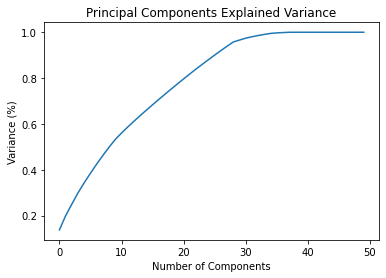

[[-5.95414743e-01 -4.92246100e-01 -8.15085442e-01 ...  3.20105915e-02
  -1.74042388e-02 -3.77806652e-02]
 [-1.62939403e+00  4.24530271e-01 -7.86225481e-01 ...  2.14538191e-02
   5.93109030e-03 -3.16201776e-02]
 [-1.46948396e+00  5.98464710e-01 -6.92648436e-01 ... -3.57431463e-02
  -6.57683845e-04  9.73606429e-02]
 ...
 [ 3.99214465e+00 -1.91508521e+00 -1.68940319e+00 ... -3.91712217e-01
   4.88684229e-02 -1.86348379e-01]
 [-5.02993004e-01 -4.59452007e-01 -4.74473379e-01 ...  5.51951627e-02
   9.30594692e-03 -7.43958105e-02]
 [-1.48751493e+00  2.87027567e-01 -8.76067948e-01 ... -1.20028328e-02
  -3.70432068e-03  9.55777549e-02]]
[[-5.95414743e-01 -4.92246100e-01 -8.15085442e-01 ...  3.20105915e-02
  -1.74042388e-02 -3.77806652e-02]
 [-1.62939403e+00  4.24530271e-01 -7.86225481e-01 ...  2.14538191e-02
   5.93109030e-03 -3.16201776e-02]
 [-1.46948396e+00  5.98464710e-01 -6.92648436e-01 ... -3.57431463e-02
  -6.57683845e-04  9.73606429e-02]
 ...
 [ 3.99214465e+00 -1.91508521e+00 -1.6894031

In [20]:
pca = PCA().fit(train_x)
itemindex = np.where(np.cumsum(pca.explained_variance_ratio_)>0.9999)
print('np.cumsum(pca.explained_variance_ratio_)',      np.cumsum(pca.explained_variance_ratio_))
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(np.cumsum(pca.explained_variance_ratio_)[0])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Principal Components Explained Variance')
plt.show()
pca_std = PCA(n_components=itemindex[0][0]).fit(train_x)
train_x = pca_std.transform(train_x)
test_x = pca_std.transform(test_x)
print(train_x)
print(test_x)

In [21]:
le = preprocessing.LabelEncoder()
train_y=le.fit_transform(train_y)
print(train_y)

[0 0 0 ... 0 0 0]


In [22]:
train_x.shape

(7414, 38)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=1/3, random_state=0)

In [24]:
test_x.shape

(7414, 38)

In [25]:
logreg=LogisticRegression(class_weight="balanced",C=0.00001,max_iter=1000000)
logreg.fit(X_train, y_train)


LogisticRegression(C=1e-05, class_weight='balanced', max_iter=1000000)

In [28]:
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error

print(sqrt(mean_squared_error(y_test, logreg.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(logreg.score(X_test,y_test)))

0.4519823291788824
R2 Value/Coefficient of Determination: 0.7957119741100324


In [30]:
testpred=pd.DataFrame(logreg.predict(test_x))
testpred.to_csv("test_pred.csv")